# Image Classification of Breast Cancer Slides
## By Kiana Gonzalez-Rodholm

In [2]:
# create results directory
import os
import cv2
import matplotlib.pyplot as plt
from pathlib import Path

current_dir = Path(os.getcwd()).absolute()
results_dir = current_dir.joinpath('results')
results_dir.mkdir(parents=True, exist_ok=True)

In [3]:
# import images
# function for pulling images off local file by folder
def import_images(folder,target):
    images = []
    for item in os.listdir(folder):
        img = cv2.imread(os.path.join(folder,item),0)
        if img is not None:
            images.append([img,target])
    return images

# define the different images
bengin = import_images("Dataset_BUSI_with_GT/benign/",0)
malignant = import_images("Dataset_BUSI_with_GT/malignant/",1)
normal = import_images("Dataset_BUSI_with_GT/normal/",2)

# combine all three into one set 
bengin.extend(malignant)
bengin.extend(normal)

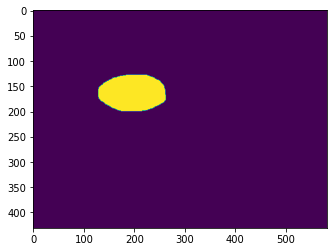

In [4]:
# view one sample
plt.imshow(bengin[600][0])

In [5]:
# create feature matrix for labels
full_data = bengin # rename full set to be more clear

feature_matrix = []
label = []
for x,y in full_data:
    feature_matrix.append(x)
    label.append(y)
    
feature_matrix[0]

array([[  7,   2,   4, ..., 197, 184, 176],
       [198,  45,   0, ..., 200, 191, 183],
       [212,  45,   9, ..., 207, 203, 194],
       ...,
       [ 25,  24,  23, ...,  22,  27,  26],
       [ 24,  23,  23, ...,  30,  32,  31],
       [ 26,  25,  25, ...,  34,  34,  32]], dtype=uint8)

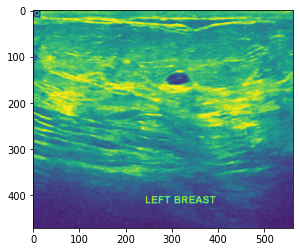

In [6]:
# test image
plt.imshow(feature_matrix[0])

In [7]:
# test label
label[0]

0

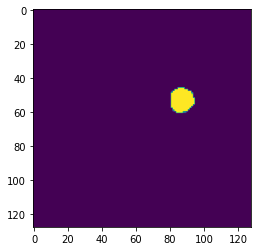

In [8]:
# resize images
X=[]
img_size=128

for x in feature_matrix:
    new_array = cv2.resize(x,(img_size,img_size))
    X.append(new_array)
    
X_corrected = []
for image in X:
    image = image/255
    X_corrected.append(image)

plt.imshow(X_corrected[213])


In [9]:
import numpy as np

X_M = np.array(X_corrected)
X_M.shape

(1578, 128, 128)

In [11]:
X_M_R = np.reshape(X_M, [1578,128,128,1])
X_M_R.shape

(1578, 128, 128, 1)

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X_M_R,label)

print("X_train size: ",X_train.shape)
print("X_test Size: ",X_test.shape)

X_train size:  (1183, 128, 128, 1)
X_test Size:  (395, 128, 128, 1)


In [43]:
# build initial model
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(128, 128,1)))
model.add(layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(layers.Dense(3, activation='softmax'))

In [44]:
# save model summary to text file
def myprint(s):
    with open('results/model_summary.txt','a') as f:
        print(s, file=f)

model.summary(print_fn=myprint)

In [45]:
print(model.summary())

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_57 (Conv2D)          (None, 128, 128, 32)      320       
                                                                 
 conv2d_58 (Conv2D)          (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 64, 64, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_59 (Conv2D)          (None, 64, 64, 64)        18496     
                                                                 
 conv2d_60 (Conv2D)          (None, 64, 64, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 32, 32, 64)       0         
 g2D)                                                 

In [46]:
from tensorflow.keras.optimizers import Adam

optimizer = Adam(learning_rate=0.001)

# compile and fit model
model.compile(optimizer=optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(np.array(X_train), 
                    np.array(y_train), 
                    epochs=20, 
                    validation_data = (X_test, np.array(y_test)))

Epoch 1/20
37/37 [==============================] - 52s 1s/step - loss: 1.1321 - accuracy: 0.5511 - val_loss: 0.8642 - val_accuracy: 0.6608
Epoch 2/20
37/37 [==============================] - 49s 1s/step - loss: 0.7128 - accuracy: 0.6881 - val_loss: 0.6859 - val_accuracy: 0.6785
Epoch 3/20
37/37 [==============================] - 50s 1s/step - loss: 0.6064 - accuracy: 0.7346 - val_loss: 0.6565 - val_accuracy: 0.7215
Epoch 4/20
37/37 [==============================] - 49s 1s/step - loss: 0.4846 - accuracy: 0.7929 - val_loss: 1.1367 - val_accuracy: 0.6658
Epoch 5/20
37/37 [==============================] - 51s 1s/step - loss: 0.4273 - accuracy: 0.8326 - val_loss: 0.6867 - val_accuracy: 0.7443
Epoch 6/20
37/37 [==============================] - 52s 1s/step - loss: 0.2684 - accuracy: 0.8986 - val_loss: 0.8936 - val_accuracy: 0.7772
Epoch 7/20
37/37 [==============================] - 51s 1s/step - loss: 0.1926 - accuracy: 0.9290 - val_loss: 1.2827 - val_accuracy: 0.7722
Epoch 8/20
37/37 [==

In [47]:
# printing history for visualization/confirmation
print(history.history)

{'loss': [1.1321314573287964, 0.7128023505210876, 0.6063567996025085, 0.4845714569091797, 0.42730626463890076, 0.2684369385242462, 0.19262170791625977, 0.18021586537361145, 0.07892332226037979, 0.06900050491094589, 0.02959851734340191, 0.05136852338910103, 0.051684655249118805, 0.032041266560554504, 0.02168978750705719, 0.031036386266350746, 0.014297271147370338, 0.027482392266392708, 0.07241210341453552, 0.03524443134665489], 'accuracy': [0.5511411428451538, 0.6880811452865601, 0.7345731258392334, 0.7928994297981262, 0.8326289057731628, 0.8985629677772522, 0.9289940595626831, 0.9509720802307129, 0.9746407270431519, 0.9780219793319702, 0.9923922419548035, 0.9873203635215759, 0.9830938577651978, 0.9915469288825989, 0.9923922419548035, 0.9923922419548035, 0.995773434638977, 0.9907016158103943, 0.9797126054763794, 0.9873203635215759], 'val_loss': [0.8641596436500549, 0.6858797073364258, 0.6565313935279846, 1.1366560459136963, 0.6866621375083923, 0.893570065498352, 1.2826826572418213, 1.04

In [48]:
# save model
model.save('results/model.h5')

In [49]:
test_history = model.evaluate(np.array(X_test), np.array(y_test))

13/13 [==============================] - 3s 225ms/step - loss: 1.3801 - accuracy: 0.7595


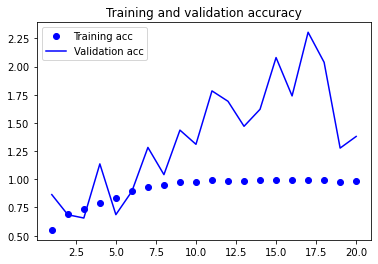

<Figure size 432x288 with 0 Axes>

In [50]:
# plotting training and validation accuracy
import matplotlib.pyplot as plt

acc = history.history['accuracy']
loss = history.history['loss']
test_loss = history.history['val_accuracy']
test_acc = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, test_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.show()

# save image to results folder
plt.savefig('results/acc_plot.png')

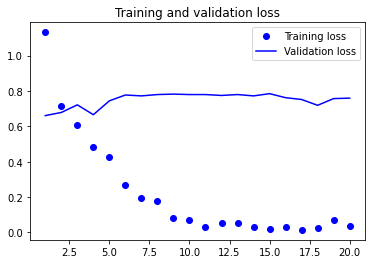

<Figure size 432x288 with 0 Axes>

In [51]:
# plotting training and validation loss
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, test_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# save image to results folder
plt.savefig('results/loss_plot.png')

In [56]:
predicted = []
for item in model.predict(X_test):
    predicted.append(np.argmax(item))
    
print(X_test.shape)

13/13 [==============================] - 3s 222ms/step
(395, 128, 128, 1)


In [57]:
import numpy as np
import pandas as pd

# save predictions to csv file
prediction = pd.DataFrame(predicted).to_csv('results/model_predictions.csv', index=False)

In [59]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# confusion matrix of predictions
conf = confusion_matrix(y_test,predicted)
conf

array([[179,  22,  10],
       [ 40,  64,   5],
       [ 16,   2,  57]], dtype=int64)

Text(0.5, 117.59999999999997, 'Predictions')

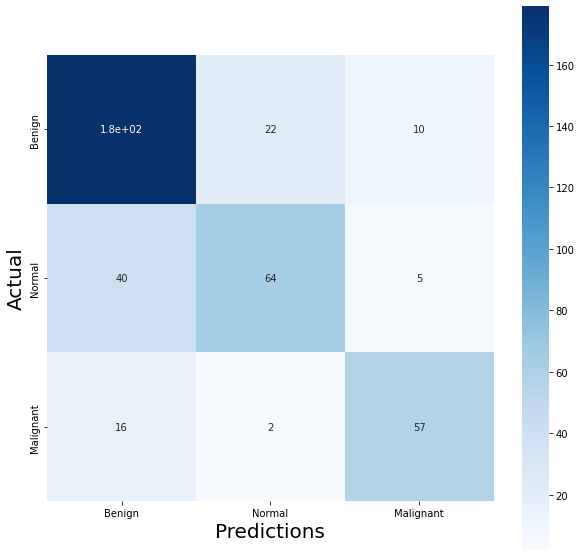

In [65]:
import seaborn as sns

# plot confusion matrix onto a heatmap
types = ['Benign','Normal','Malignant']

plt.figure(figsize = (10,10))
ax = sns.heatmap(conf, cmap=plt.cm.Blues, annot=True, square=True, xticklabels = types, yticklabels = types)
ax.set_ylabel('Actual', fontsize=20)
ax.set_xlabel('Predictions', fontsize=20)

# save image to results folder
plt.savefig('results/heatmap.png')

In [66]:
# generate a function that when the user inputs an image, it uses the model and displays the result
def image_prediction(img):
    img1=img.reshape(1,128,128,1)
    predict = np.argmax(model.predict(img1))
    if predict==0:
        print('You are healthy, all tests came back normal.')
    elif predict==1:
        print('Benign cells were found, there is no need for concern at this time. If needed, please consult your doctor.')
    else:
        print("Malignant cells found that are cancerous. Visit your doctor as soon as possible.")

In [67]:
image_prediction(X_test[12])

1/1 [==============================] - 0s 47ms/step
You are healthy, all tests came back normal.


In [68]:
image_prediction(X_test[270])

1/1 [==============================] - 0s 33ms/step
Malignant cells found that are cancerous. Visit your doctor as soon as possible.


In [69]:
image_prediction(X_test[138])

1/1 [==============================] - 0s 30ms/step
Benign cells were found, there is no need for concern at this time. If needed, please consult your doctor.
